# Pandas Introduction
[<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/500px-Pandas_logo.svg.png" width="250"/>](image.png)

pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.





To load the pandas package and start working with it, import the package. The community agreed alias for pandas is `pd`, so loading pandas as `pd` is assumed standard practice for all of the pandas documentation.

In [1043]:
import pandas as pd
import numpy as np

## Series

A Pandas Series is a one-dimensional labeled array capable of holding data of various types, including integers, strings, floating-point numbers, and Python objects.

We can manually create a Series from scratch. To do this, we initially define a Python `list`

In [1044]:
mydata = ['Boat', 'Car', 'Bike', 'Truck']

And pass the python `list` as an argument to `pd.Series()`

In [1045]:
myseries1 = pd.Series(mydata)

If we print our series..

In [1046]:
print(myseries1)

0     Boat
1      Car
2     Bike
3    Truck
dtype: object


We can see that each value will have an `index` and also the datatype of the series. In this example, the values are all `object` which is similar to a `string` type in Python

If we create another series with integers,

In [1047]:
mydata = [1, 55, 99, 43]
myseries2 = pd.Series(mydata)
print(myseries2)

0     1
1    55
2    99
3    43
dtype: int64


Our new series will have a dtype of `int64` which means myseries2 contains integers

## DataFrame

A DataFrame is a 2-dimensional data structure that can store data of different types (including characters, integers, floating point values, categorical data and more) in columns. It is similar to a spreadsheet, a SQL table


<img src = "https://pandas.pydata.org/docs/_images/01_table_dataframe.svg"/>


Similar to a pandas `Series`, we can manually create a `DataFrame` by defining a `list` of `tuples`.

In [1048]:
mydfdata = [('Boat', 1), ('Car', 55), ('Bike',99), ('Truck', 43)]

And pass the python `list` as an argument to `pd.DataFrame()`.

In [1049]:
mydf = pd.DataFrame(mydfdata)

mydf

,0,1
0,Boat,1
1,Car,55
2,Bike,99
3,Truck,43


Because we are now working with a `DataFrame`, it is better to put a name for each column in our `DataFrame` by passing a python `list` to the columns parameter. Here we will name our first column 'item' and our second column 'price'

In [1050]:
mydf = pd.DataFrame(mydfdata, columns=['item', 'price'])

mydf

,item,price
0,Boat,1
1,Car,55
2,Bike,99
3,Truck,43


Remember that each column in a `DataFrame` is a `Series`

<img src="https://pandas.pydata.org/docs/_images/01_table_series.svg" />

When selecting a single column of a pandas `DataFrame`, the result is a pandas `Series`. To select the column, use the column label in between square brackets [].

In [1051]:
mydf['item']

,item
0,Boat
1,Car
2,Bike
3,Truck


To show that each column is a `Series`, we can use the built in python `type()` function

In [1052]:
type(mydf['item'])

pandas.core.series.Series

In [1053]:
mydf['price']

,price
0,1
1,55
2,99
3,43


In [1054]:
type(mydf['price'])

pandas.core.series.Series

We can inspect all data types of a `DataFrame` by using `.dtypes`

In [1055]:
mydf.dtypes

,0
item,object
price,int64


# Reading in Data

Pandas provides a suite of read functions designed to import data from various file formats and data sources into a DataFrame. These functions are crucial for data loading and preprocessing in Python.

There are multiple ways to retrieve file/dataset. In this example, we are downloading the file directly from kagglehub by using the `dataset_download` function.

First, we need to import the kagglehub package. In kagglehub, datasets are commonly found in other users accounts. To retrieve a dataset from an account in kaggle, we need to define the username and the name of the dataset.


In [1056]:
import kagglehub

filepath = kagglehub.dataset_download('robikscube/mr-beast-youtube-video-statistics')

The `dataset_download` function returns a file path or a directory of the dataset and not the file itself. To verify that it is a path, we can use the `os.path.isdir()` function

In [1057]:
import os

if os.path.isdir(filepath):
  print(True)


True


Then use `os.listdir()` to check the files inside the path or directory.

In [1058]:
contents = os.listdir(filepath)
contents

['MrBeast_youtube_stats.csv', 'thumbnails']

In [1059]:
mydataset = filepath + "/" + contents[0]
mydataset

'/root/.cache/kagglehub/datasets/robikscube/mr-beast-youtube-video-statistics/versions/2/MrBeast_youtube_stats.csv'

We can use `pd.read_csv` to read a comma-separated values (csv) file into `DataFrame`.

In [1060]:
df = pd.read_csv(mydataset)

# Inspect The Data

To see the contents of our data, we can use the pandas `.head()` function. By default, `.head()` will display the first 5 rows of a dataframe

In [1061]:
# Head / Tail
df.head()

,id,title,description,publishTime,kind_stats,duration_seconds,viewCount,likeCount,commentCount,thumbnails.default.url,...,thumbnails.high.width,thumbnails.high.height,contentDetails.duration,contentDetails.dimension,topicDetails.topicCategories,snippet.defaultLanguage,localizations.en.title,localizations.en.description,snippet.tags,contentDetails.contentRating.ytRating
0,TQHEJj68Jew,I Got Hunted By A Real Bounty Hunter,"Sign up for Current w/ my Creator Code ""BEAST""...",2021-04-24 20:00:00+00:00,youtube#video,861,84717282.0,2876493.0,128922.0,https://i.ytimg.com/vi/TQHEJj68Jew/default.jpg,...,480.0,360.0,PT14M21S,2d,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,NaN,NaN,NaN,NaN,NaN
1,00NgUctWoLQ,"Extreme $1,000,000 Hide And Seek",I didn't expect that to happen at the end I wa...,2021-12-18 21:00:00+00:00,youtube#video,729,32090178.0,2125183.0,73593.0,https://i.ytimg.com/vi/00NgUctWoLQ/default.jpg,...,480.0,360.0,PT12M9S,2d,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,en,"Extreme $1,000,000 Hide And Seek",I didn't expect that to happen at the end I wa...,NaN,NaN
2,NaN,MrBeast,Accomplishments - Raised $20000000 To Plant 20...,2012-02-20 00:43:50+00:00,NaN,0,NaN,NaN,NaN,https://yt3.ggpht.com/ytc/AKedOLTctGKJ32CdDLiS...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ayXxwJJId_c,I Bought The World&#39;s Largest Mystery Box! ...,I cant believe I spent over $500000 on mystery...,2021-04-03 20:00:01+00:00,youtube#video,709,101745632.0,3110824.0,162796.0,https://i.ytimg.com/vi/ayXxwJJId_c/default.jpg,...,480.0,360.0,PT11M49S,2d,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,NaN,NaN,NaN,NaN,NaN
4,cExLQ1o2pDw,"First To Rob Bank Wins $100,000",I didnt think he would actually rob the bank.....,2021-09-26 20:00:06+00:00,youtube#video,482,50008942.0,2359606.0,120621.0,https://i.ytimg.com/vi/cExLQ1o2pDw/default.jpg,...,480.0,360.0,PT8M2S,2d,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,NaN,NaN,NaN,NaN,NaN


We can also use the `.tail()` function to view the last 5 rows of the dataframe.

In [1062]:
df.tail()

,id,title,description,publishTime,kind_stats,duration_seconds,viewCount,likeCount,commentCount,thumbnails.default.url,...,thumbnails.high.width,thumbnails.high.height,contentDetails.duration,contentDetails.dimension,topicDetails.topicCategories,snippet.defaultLanguage,localizations.en.title,localizations.en.description,snippet.tags,contentDetails.contentRating.ytRating
242,yeHjsYQ076A,Remember When COD Was Fun?,"Yup, another very pointless video ▻ Subscribe?...",2015-04-26 21:26:36+00:00,youtube#video,216,16312.0,574.0,145.0,https://i.ytimg.com/vi/yeHjsYQ076A/default.jpg,...,480.0,360.0,PT3M36S,2d,['https://en.wikipedia.org/wiki/Action-adventu...,NaN,NaN,NaN,"['How', 'much', 'money', 'does', 'make', 'blac...",NaN
243,X7doE4h6W64,Insane Gun Sync - 7 Hours To Make,Look at this - http://gyazo.com/8852509d2350db...,2015-06-21 12:22:34+00:00,youtube#video,134,15740.0,637.0,105.0,https://i.ytimg.com/vi/X7doE4h6W64/default.jpg,...,480.0,360.0,PT2M14S,2d,['https://en.wikipedia.org/wiki/Action-adventu...,NaN,NaN,NaN,"['How', 'much', 'money', 'does', 'make', 'blac...",NaN
244,AIytwdufwW8,MY MESSAGE TO COD YOUTUBERS (Watch till end plz),The beginning of the video is a little off top...,2015-05-29 20:07:48+00:00,youtube#video,292,18502.0,508.0,117.0,https://i.ytimg.com/vi/AIytwdufwW8/default.jpg,...,480.0,360.0,PT4M52S,2d,['https://en.wikipedia.org/wiki/Action-adventu...,NaN,NaN,NaN,"['How', 'much', 'money', 'does', 'make', 'blac...",NaN
245,56OkH6ocYZU,L0114R - Biblical Creeper Post for Post @L0114R,His channel - https://www.youtube.com/user/the...,2015-05-15 16:48:54+00:00,youtube#video,109,16627.0,430.0,134.0,https://i.ytimg.com/vi/56OkH6ocYZU/default.jpg,...,480.0,360.0,PT1M49S,2d,['https://en.wikipedia.org/wiki/Action-adventu...,NaN,NaN,NaN,"['How', 'much', 'money', 'does', 'make', 'blac...",NaN
246,zi7tZ-2PhLk,How Much Money Do You Make As An Uber Driver??...,In this video I talk about being an uber drive...,2015-05-31 18:31:25+00:00,youtube#video,304,18773.0,370.0,59.0,https://i.ytimg.com/vi/zi7tZ-2PhLk/default.jpg,...,480.0,360.0,PT5M4S,2d,['https://en.wikipedia.org/wiki/Action-adventu...,NaN,NaN,NaN,"['How', 'much', 'money', 'does', 'make', 'blac...",NaN


We can `.dtypes` again to view the datatypes of each column in our dataframe

In [1063]:
df.dtypes

,0
id,object
title,object
description,object
publishTime,object
kind_stats,object
duration_seconds,int64
viewCount,float64
likeCount,float64
commentCount,float64
thumbnails.default.url,object


One very important aspect of inspecting our data is viewing the statistical summary of our dataframe.


When dealing with a massive dataset, it is very helpful to know some insights of what we are dealing with.

The `.describe()` is a quick way to get a statistical summary of our data in a DataFrame and will show answer key questions that include

- What’s the average value?
- Are there outliers?
- How spread out is the data?
- What are the trends and anomalies?





In [1064]:
df.describe()

,duration_seconds,viewCount,likeCount,commentCount,thumbnails.default.width,thumbnails.default.height,thumbnails.medium.width,thumbnails.medium.height,thumbnails.high.width,thumbnails.high.height
count,247.000000,2.460000e+02,2.440000e+02,245.000000,246.0,246.0,246.0,246.0,246.0,246.0
mean,1886.234818,5.084638e+07,1.610498e+06,75562.783673,120.0,90.0,320.0,180.0,480.0,360.0
std,8642.188728,4.062672e+07,1.879529e+06,85356.537127,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,1.395400e+04,3.700000e+02,59.000000,120.0,90.0,320.0,180.0,480.0,360.0
25%,425.500000,1.406442e+07,4.348780e+05,21552.000000,120.0,90.0,320.0,180.0,480.0,360.0
50%,776.000000,4.904782e+07,1.358232e+06,60701.000000,120.0,90.0,320.0,180.0,480.0,360.0
75%,923.000000,8.125392e+07,2.294378e+06,99670.000000,120.0,90.0,320.0,180.0,480.0,360.0
max,85686.000000,1.787632e+08,1.904943e+07,726861.000000,120.0,90.0,320.0,180.0,480.0,360.0


Here’s what each part means:

- `count`: Number of non-null (non-missing) entries.
- `mean`: The average value.

- `std` (Standard Deviation): Tells you how spread out the data is. A high value means more variability.

- `min`: The smallest value in the column.

25%, 50%, 75% (Percentiles/Quartiles):

- `25%`: The first quartile — 25% of the data falls below this value.

- `50%`: The median (middle value).

- `75%`: The third quartile — 75% of the data falls below this value.

- `max`: The highest value in the column.

# Columns and Rows

To view a specific column of a DataFrame, we simply put dataframe and then the name of the column inside square brackets [].

In [1065]:
df['viewCount']

,viewCount
0,84717282.0
1,32090178.0
2,NaN
3,101745632.0
4,50008942.0
...,...
242,16312.0
243,15740.0
244,18502.0
245,16627.0


Looking back at our dataframe, we can see that there is a unique index number (0-246) for each row.

In [1066]:
df

,id,title,description,publishTime,kind_stats,duration_seconds,viewCount,likeCount,commentCount,thumbnails.default.url,...,thumbnails.high.width,thumbnails.high.height,contentDetails.duration,contentDetails.dimension,topicDetails.topicCategories,snippet.defaultLanguage,localizations.en.title,localizations.en.description,snippet.tags,contentDetails.contentRating.ytRating
0,TQHEJj68Jew,I Got Hunted By A Real Bounty Hunter,"Sign up for Current w/ my Creator Code ""BEAST""...",2021-04-24 20:00:00+00:00,youtube#video,861,84717282.0,2876493.0,128922.0,https://i.ytimg.com/vi/TQHEJj68Jew/default.jpg,...,480.0,360.0,PT14M21S,2d,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,NaN,NaN,NaN,NaN,NaN
1,00NgUctWoLQ,"Extreme $1,000,000 Hide And Seek",I didn't expect that to happen at the end I wa...,2021-12-18 21:00:00+00:00,youtube#video,729,32090178.0,2125183.0,73593.0,https://i.ytimg.com/vi/00NgUctWoLQ/default.jpg,...,480.0,360.0,PT12M9S,2d,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,en,"Extreme $1,000,000 Hide And Seek",I didn't expect that to happen at the end I wa...,NaN,NaN
2,NaN,MrBeast,Accomplishments - Raised $20000000 To Plant 20...,2012-02-20 00:43:50+00:00,NaN,0,NaN,NaN,NaN,https://yt3.ggpht.com/ytc/AKedOLTctGKJ32CdDLiS...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ayXxwJJId_c,I Bought The World&#39;s Largest Mystery Box! ...,I cant believe I spent over $500000 on mystery...,2021-04-03 20:00:01+00:00,youtube#video,709,101745632.0,3110824.0,162796.0,https://i.ytimg.com/vi/ayXxwJJId_c/default.jpg,...,480.0,360.0,PT11M49S,2d,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,NaN,NaN,NaN,NaN,NaN
4,cExLQ1o2pDw,"First To Rob Bank Wins $100,000",I didnt think he would actually rob the bank.....,2021-09-26 20:00:06+00:00,youtube#video,482,50008942.0,2359606.0,120621.0,https://i.ytimg.com/vi/cExLQ1o2pDw/default.jpg,...,480.0,360.0,PT8M2S,2d,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,yeHjsYQ076A,Remember When COD Was Fun?,"Yup, another very pointless video ▻ Subscribe?...",2015-04-26 21:26:36+00:00,youtube#video,216,16312.0,574.0,145.0,https://i.ytimg.com/vi/yeHjsYQ076A/default.jpg,...,480.0,360.0,PT3M36S,2d,['https://en.wikipedia.org/wiki/Action-adventu...,NaN,NaN,NaN,"['How', 'much', 'money', 'does', 'make', 'blac...",NaN
243,X7doE4h6W64,Insane Gun Sync - 7 Hours To Make,Look at this - http://gyazo.com/8852509d2350db...,2015-06-21 12:22:34+00:00,youtube#video,134,15740.0,637.0,105.0,https://i.ytimg.com/vi/X7doE4h6W64/default.jpg,...,480.0,360.0,PT2M14S,2d,['https://en.wikipedia.org/wiki/Action-adventu...,NaN,NaN,NaN,"['How', 'much', 'money', 'does', 'make', 'blac...",NaN
244,AIytwdufwW8,MY MESSAGE TO COD YOUTUBERS (Watch till end plz),The beginning of the video is a little off top...,2015-05-29 20:07:48+00:00,youtube#video,292,18502.0,508.0,117.0,https://i.ytimg.com/vi/AIytwdufwW8/default.jpg,...,480.0,360.0,PT4M52S,2d,['https://en.wikipedia.org/wiki/Action-adventu...,NaN,NaN,NaN,"['How', 'much', 'money', 'does', 'make', 'blac...",NaN
245,56OkH6ocYZU,L0114R - Biblical Creeper Post for Post @L0114R,His channel - https://www.youtube.com/user/the...,2015-05-15 16:48:54+00:00,youtube#video,109,16627.0,430.0,134.0,https://i.ytimg.com/vi/56OkH6ocYZU/default.jpg,...,480.0,360.0,PT1M49S,2d,['https://en.wikipedia.org/wiki/Action-adventu...,NaN,NaN,NaN,"['How', 'much', 'money', 'does', 'make', 'blac...",NaN


We can use this index number to view a specific row.

To view a row, we can use `.loc` and specify the index number inside the square brackets []

In [1067]:
df.loc[4]

,4
id,cExLQ1o2pDw
title,"First To Rob Bank Wins $100,000"
description,I didnt think he would actually rob the bank.....
publishTime,2021-09-26 20:00:06+00:00
kind_stats,youtube#video
duration_seconds,482
viewCount,50008942.0
likeCount,2359606.0
commentCount,120621.0
thumbnails.default.url,https://i.ytimg.com/vi/cExLQ1o2pDw/default.jpg


Looking at our dataframe, notice that we already have an `'id'` column that uniquely identifies each row. We can make it as our row index by using the `.set_index` function.

In [1068]:
df = df.set_index('id')

As we can see, the values in the `'id'` column became the index numbers for each row.

In [1069]:
df

,title,description,publishTime,kind_stats,duration_seconds,viewCount,likeCount,commentCount,thumbnails.default.url,thumbnails.default.width,...,thumbnails.high.width,thumbnails.high.height,contentDetails.duration,contentDetails.dimension,topicDetails.topicCategories,snippet.defaultLanguage,localizations.en.title,localizations.en.description,snippet.tags,contentDetails.contentRating.ytRating
id,,,,,,,,,,,,,,,,,,,,,
TQHEJj68Jew,I Got Hunted By A Real Bounty Hunter,"Sign up for Current w/ my Creator Code ""BEAST""...",2021-04-24 20:00:00+00:00,youtube#video,861,84717282.0,2876493.0,128922.0,https://i.ytimg.com/vi/TQHEJj68Jew/default.jpg,120.0,...,480.0,360.0,PT14M21S,2d,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,NaN,NaN,NaN,NaN,NaN
00NgUctWoLQ,"Extreme $1,000,000 Hide And Seek",I didn't expect that to happen at the end I wa...,2021-12-18 21:00:00+00:00,youtube#video,729,32090178.0,2125183.0,73593.0,https://i.ytimg.com/vi/00NgUctWoLQ/default.jpg,120.0,...,480.0,360.0,PT12M9S,2d,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,en,"Extreme $1,000,000 Hide And Seek",I didn't expect that to happen at the end I wa...,NaN,NaN
NaN,MrBeast,Accomplishments - Raised $20000000 To Plant 20...,2012-02-20 00:43:50+00:00,NaN,0,NaN,NaN,NaN,https://yt3.ggpht.com/ytc/AKedOLTctGKJ32CdDLiS...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ayXxwJJId_c,I Bought The World&#39;s Largest Mystery Box! ...,I cant believe I spent over $500000 on mystery...,2021-04-03 20:00:01+00:00,youtube#video,709,101745632.0,3110824.0,162796.0,https://i.ytimg.com/vi/ayXxwJJId_c/default.jpg,120.0,...,480.0,360.0,PT11M49S,2d,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,NaN,NaN,NaN,NaN,NaN
cExLQ1o2pDw,"First To Rob Bank Wins $100,000",I didnt think he would actually rob the bank.....,2021-09-26 20:00:06+00:00,youtube#video,482,50008942.0,2359606.0,120621.0,https://i.ytimg.com/vi/cExLQ1o2pDw/default.jpg,120.0,...,480.0,360.0,PT8M2S,2d,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yeHjsYQ076A,Remember When COD Was Fun?,"Yup, another very pointless video ▻ Subscribe?...",2015-04-26 21:26:36+00:00,youtube#video,216,16312.0,574.0,145.0,https://i.ytimg.com/vi/yeHjsYQ076A/default.jpg,120.0,...,480.0,360.0,PT3M36S,2d,['https://en.wikipedia.org/wiki/Action-adventu...,NaN,NaN,NaN,"['How', 'much', 'money', 'does', 'make', 'blac...",NaN
X7doE4h6W64,Insane Gun Sync - 7 Hours To Make,Look at this - http://gyazo.com/8852509d2350db...,2015-06-21 12:22:34+00:00,youtube#video,134,15740.0,637.0,105.0,https://i.ytimg.com/vi/X7doE4h6W64/default.jpg,120.0,...,480.0,360.0,PT2M14S,2d,['https://en.wikipedia.org/wiki/Action-adventu...,NaN,NaN,NaN,"['How', 'much', 'money', 'does', 'make', 'blac...",NaN
AIytwdufwW8,MY MESSAGE TO COD YOUTUBERS (Watch till end plz),The beginning of the video is a little off top...,2015-05-29 20:07:48+00:00,youtube#video,292,18502.0,508.0,117.0,https://i.ytimg.com/vi/AIytwdufwW8/default.jpg,120.0,...,480.0,360.0,PT4M52S,2d,['https://en.wikipedia.org/wiki/Action-adventu...,NaN,NaN,NaN,"['How', 'much', 'money', 'does', 'make', 'blac...",NaN


And we can now use it to view a row using the `.loc`

In [1070]:
df.loc['cExLQ1o2pDw']

,cExLQ1o2pDw
title,"First To Rob Bank Wins $100,000"
description,I didnt think he would actually rob the bank.....
publishTime,2021-09-26 20:00:06+00:00
kind_stats,youtube#video
duration_seconds,482
viewCount,50008942.0
likeCount,2359606.0
commentCount,120621.0
thumbnails.default.url,https://i.ytimg.com/vi/cExLQ1o2pDw/default.jpg
thumbnails.default.width,120.0


# Subsetting Data

Sometimes, we need to view mutiple rows or column in a DataFrame and filter out rows or columns that we are not interested in.  In pandas, one way to filter out rows or columns is to create a subset.

Looking at our DataFrame, we have 247 rows and 25 columns.

In [1071]:
df.shape

(247, 25)

Let us say that we only want to use the first eight (8) columns of our dataframe.

To quickly list all columns, we can use the `.columns` function

## Subsetting columns

In [1072]:
df.columns

Index(['title', 'description', 'publishTime', 'kind_stats', 'duration_seconds',
       'viewCount', 'likeCount', 'commentCount', 'thumbnails.default.url',
       'thumbnails.default.width', 'thumbnails.default.height',
       'thumbnails.medium.url', 'thumbnails.medium.width',
       'thumbnails.medium.height', 'thumbnails.high.url',
       'thumbnails.high.width', 'thumbnails.high.height',
       'contentDetails.duration', 'contentDetails.dimension',
       'topicDetails.topicCategories', 'snippet.defaultLanguage',
       'localizations.en.title', 'localizations.en.description',
       'snippet.tags', 'contentDetails.contentRating.ytRating'],
      dtype='object')

To create a subset of columns of our dataframe, we can simply define a list of the columns we want to retain.

In [1073]:
selectedcolumns = ['title', 'description', 'publishTime',
         'duration_seconds', 'viewCount', 'likeCount',
         'commentCount']

And pass the list to our existing dataframe

In [1074]:
# Subsetting Columns
df = df[selectedcolumns]

In [1075]:
df

,title,description,publishTime,duration_seconds,viewCount,likeCount,commentCount
id,,,,,,,
TQHEJj68Jew,I Got Hunted By A Real Bounty Hunter,"Sign up for Current w/ my Creator Code ""BEAST""...",2021-04-24 20:00:00+00:00,861,84717282.0,2876493.0,128922.0
00NgUctWoLQ,"Extreme $1,000,000 Hide And Seek",I didn't expect that to happen at the end I wa...,2021-12-18 21:00:00+00:00,729,32090178.0,2125183.0,73593.0
NaN,MrBeast,Accomplishments - Raised $20000000 To Plant 20...,2012-02-20 00:43:50+00:00,0,NaN,NaN,NaN
ayXxwJJId_c,I Bought The World&#39;s Largest Mystery Box! ...,I cant believe I spent over $500000 on mystery...,2021-04-03 20:00:01+00:00,709,101745632.0,3110824.0,162796.0
cExLQ1o2pDw,"First To Rob Bank Wins $100,000",I didnt think he would actually rob the bank.....,2021-09-26 20:00:06+00:00,482,50008942.0,2359606.0,120621.0
...,...,...,...,...,...,...,...
yeHjsYQ076A,Remember When COD Was Fun?,"Yup, another very pointless video ▻ Subscribe?...",2015-04-26 21:26:36+00:00,216,16312.0,574.0,145.0
X7doE4h6W64,Insane Gun Sync - 7 Hours To Make,Look at this - http://gyazo.com/8852509d2350db...,2015-06-21 12:22:34+00:00,134,15740.0,637.0,105.0
AIytwdufwW8,MY MESSAGE TO COD YOUTUBERS (Watch till end plz),The beginning of the video is a little off top...,2015-05-29 20:07:48+00:00,292,18502.0,508.0,117.0


## Subsetting rows

Let us say that we want to filter rows that has a view count of more than 1 million. There are two ways to filter rows.

We can use `.loc`

In [1076]:

df_subset1 = df.loc[df['viewCount'] > 1_000_000]
df_subset1

,title,description,publishTime,duration_seconds,viewCount,likeCount,commentCount
id,,,,,,,
TQHEJj68Jew,I Got Hunted By A Real Bounty Hunter,"Sign up for Current w/ my Creator Code ""BEAST""...",2021-04-24 20:00:00+00:00,861,84717282.0,2876493.0,128922.0
00NgUctWoLQ,"Extreme $1,000,000 Hide And Seek",I didn't expect that to happen at the end I wa...,2021-12-18 21:00:00+00:00,729,32090178.0,2125183.0,73593.0
ayXxwJJId_c,I Bought The World&#39;s Largest Mystery Box! ...,I cant believe I spent over $500000 on mystery...,2021-04-03 20:00:01+00:00,709,101745632.0,3110824.0,162796.0
cExLQ1o2pDw,"First To Rob Bank Wins $100,000",I didnt think he would actually rob the bank.....,2021-09-26 20:00:06+00:00,482,50008942.0,2359606.0,120621.0
GLoeAJUcz38,"Press This Button To Win $100,000!",Push the red subscribe button and you could al...,2020-11-14 21:00:02+00:00,911,145527042.0,2762425.0,83853.0
...,...,...,...,...,...,...,...
xWcldHxHFpo,"I Counted To 100,000!",I can't believe I did this.. Like or I eat you...,2017-01-09 00:00:39+00:00,85686,24636026.0,1162093.0,123360.0
mGIpOtncmSM,"Saying Pewdiepie 100,000 Times",I SAID HIS NAME 100000 TIMES TO STOP TSERIES I...,2018-11-25 21:07:01+00:00,42520,21226054.0,1451683.0,173172.0
9CVwXBYVqVk,"Counting To 200,000 (Road To A Mil)",I can't believe I did this *expand* Like I sai...,2017-02-18 00:00:03+00:00,84878,3357112.0,133927.0,19482.0


Or we can use `.query`

In [1077]:
df_subset2 = df.query('viewCount > 1000000')
df_subset2

,title,description,publishTime,duration_seconds,viewCount,likeCount,commentCount
id,,,,,,,
TQHEJj68Jew,I Got Hunted By A Real Bounty Hunter,"Sign up for Current w/ my Creator Code ""BEAST""...",2021-04-24 20:00:00+00:00,861,84717282.0,2876493.0,128922.0
00NgUctWoLQ,"Extreme $1,000,000 Hide And Seek",I didn't expect that to happen at the end I wa...,2021-12-18 21:00:00+00:00,729,32090178.0,2125183.0,73593.0
ayXxwJJId_c,I Bought The World&#39;s Largest Mystery Box! ...,I cant believe I spent over $500000 on mystery...,2021-04-03 20:00:01+00:00,709,101745632.0,3110824.0,162796.0
cExLQ1o2pDw,"First To Rob Bank Wins $100,000",I didnt think he would actually rob the bank.....,2021-09-26 20:00:06+00:00,482,50008942.0,2359606.0,120621.0
GLoeAJUcz38,"Press This Button To Win $100,000!",Push the red subscribe button and you could al...,2020-11-14 21:00:02+00:00,911,145527042.0,2762425.0,83853.0
...,...,...,...,...,...,...,...
xWcldHxHFpo,"I Counted To 100,000!",I can't believe I did this.. Like or I eat you...,2017-01-09 00:00:39+00:00,85686,24636026.0,1162093.0,123360.0
mGIpOtncmSM,"Saying Pewdiepie 100,000 Times",I SAID HIS NAME 100000 TIMES TO STOP TSERIES I...,2018-11-25 21:07:01+00:00,42520,21226054.0,1451683.0,173172.0
9CVwXBYVqVk,"Counting To 200,000 (Road To A Mil)",I can't believe I did this *expand* Like I sai...,2017-02-18 00:00:03+00:00,84878,3357112.0,133927.0,19482.0


## Subsetting undefined or missing values

Subsetting is very useful for spotting missing values in a `DataFrame`. We can use the `.na()` function to create a subset of columns with missing values.

In [1078]:
df['viewCount'].isna()

,viewCount
id,
TQHEJj68Jew,False
00NgUctWoLQ,False
NaN,True
ayXxwJJId_c,False
cExLQ1o2pDw,False
...,...
yeHjsYQ076A,False
X7doE4h6W64,False
AIytwdufwW8,False


Running this will display a boolean value for each row in the viewCount column. Notice the `True` value for the third row indicating that it has a missing value in this column.

We can also use `.na()` to create a subset of rows with missing values.

In [1079]:
df.loc[df['viewCount'].isna()]

,title,description,publishTime,duration_seconds,viewCount,likeCount,commentCount
id,,,,,,,
NaN,MrBeast,Accomplishments - Raised $20000000 To Plant 20...,2012-02-20 00:43:50+00:00,0,NaN,NaN,NaN


Using tilde `~` acts as a negation where it will instead display the rows that does not have a missing value in the viewCount column

In [1080]:
df = df.loc[~df['viewCount'].isna()]

In [1081]:
df = df.loc[~df['likeCount'].isna()]

# Casting dtypes

The `astype()` method in pandas is used to cast a pandas object to a specified data type.


Common use cases
- Converting string representations of numbers to actual numeric types (integers or floats) to enable mathematical operations.
- Converting numeric types to strings for display or specific data handling requirements.
- Converting object columns containing dates to datetime objects for time-series analysis (often used in conjunction with `pd.to_datetime()`).

Let us say that we want to convert `viewCount` and `likeCount` to an `integer`

In [1082]:
df.dtypes

,0
title,object
description,object
publishTime,object
duration_seconds,int64
viewCount,float64
likeCount,float64
commentCount,float64


To do this, we can use the `.astype()` function.

In [1083]:
df['viewCount'] = df['viewCount'].astype('int')
df['likeCount'] = df['likeCount'].astype('int')

In [1084]:
df.dtypes

,0
title,object
description,object
publishTime,object
duration_seconds,int64
viewCount,int64
likeCount,int64
commentCount,float64


There is another column that we need to cast. Notice that publishTime is an object type.

If we look closely, it contains year, month, date and time which should be in  datetime format

In [1085]:
df['publishTime']

,publishTime
id,
TQHEJj68Jew,2021-04-24 20:00:00+00:00
00NgUctWoLQ,2021-12-18 21:00:00+00:00
ayXxwJJId_c,2021-04-03 20:00:01+00:00
cExLQ1o2pDw,2021-09-26 20:00:06+00:00
GLoeAJUcz38,2020-11-14 21:00:02+00:00
...,...
yeHjsYQ076A,2015-04-26 21:26:36+00:00
X7doE4h6W64,2015-06-21 12:22:34+00:00
AIytwdufwW8,2015-05-29 20:07:48+00:00


We can use the `.to_datetime()` function to cast it to a datetime type.

In [1086]:
df['publishTime'] = pd.to_datetime(df['publishTime'])

We can also cast integers to strings

In [1087]:
df['likeCount'] = pd.to_numeric(df['likeCount'].astype('str'))

# Creating a new column

In [1088]:
df.head()

,title,description,publishTime,duration_seconds,viewCount,likeCount,commentCount
id,,,,,,,
TQHEJj68Jew,I Got Hunted By A Real Bounty Hunter,"Sign up for Current w/ my Creator Code ""BEAST""...",2021-04-24 20:00:00+00:00,861,84717282,2876493,128922.0
00NgUctWoLQ,"Extreme $1,000,000 Hide And Seek",I didn't expect that to happen at the end I wa...,2021-12-18 21:00:00+00:00,729,32090178,2125183,73593.0
ayXxwJJId_c,I Bought The World&#39;s Largest Mystery Box! ...,I cant believe I spent over $500000 on mystery...,2021-04-03 20:00:01+00:00,709,101745632,3110824,162796.0
cExLQ1o2pDw,"First To Rob Bank Wins $100,000",I didnt think he would actually rob the bank.....,2021-09-26 20:00:06+00:00,482,50008942,2359606,120621.0
GLoeAJUcz38,"Press This Button To Win $100,000!",Push the red subscribe button and you could al...,2020-11-14 21:00:02+00:00,911,145527042,2762425,83853.0


Let us say that we want to create a new column containing the ratio of likes and views

In [1089]:
df['like_to_view_ratio'] = df['likeCount'] / df['viewCount']

# Adding a new row

In [1090]:
df_to_append = df.tail(1)

We can use the `pd.concat()` function to append a row to our dataframe. In this example, we have appended the last row of our dataframe.

In [1091]:
df_concat = pd.concat([df, df_to_append])

In [1092]:
df_concat.tail()

,title,description,publishTime,duration_seconds,viewCount,likeCount,commentCount,like_to_view_ratio
id,,,,,,,,
X7doE4h6W64,Insane Gun Sync - 7 Hours To Make,Look at this - http://gyazo.com/8852509d2350db...,2015-06-21 12:22:34+00:00,134,15740,637,105.0,0.040470
AIytwdufwW8,MY MESSAGE TO COD YOUTUBERS (Watch till end plz),The beginning of the video is a little off top...,2015-05-29 20:07:48+00:00,292,18502,508,117.0,0.027456
56OkH6ocYZU,L0114R - Biblical Creeper Post for Post @L0114R,His channel - https://www.youtube.com/user/the...,2015-05-15 16:48:54+00:00,109,16627,430,134.0,0.025862
zi7tZ-2PhLk,How Much Money Do You Make As An Uber Driver??...,In this video I talk about being an uber drive...,2015-05-31 18:31:25+00:00,304,18773,370,59.0,0.019709
zi7tZ-2PhLk,How Much Money Do You Make As An Uber Driver??...,In this video I talk about being an uber drive...,2015-05-31 18:31:25+00:00,304,18773,370,59.0,0.019709


# Plot Examples

In [1093]:
import matplotlib.pylab as plt
plt.style.use('ggplot')

<Axes: title={'center': 'Distribution of View Count'}, ylabel='Frequency'>

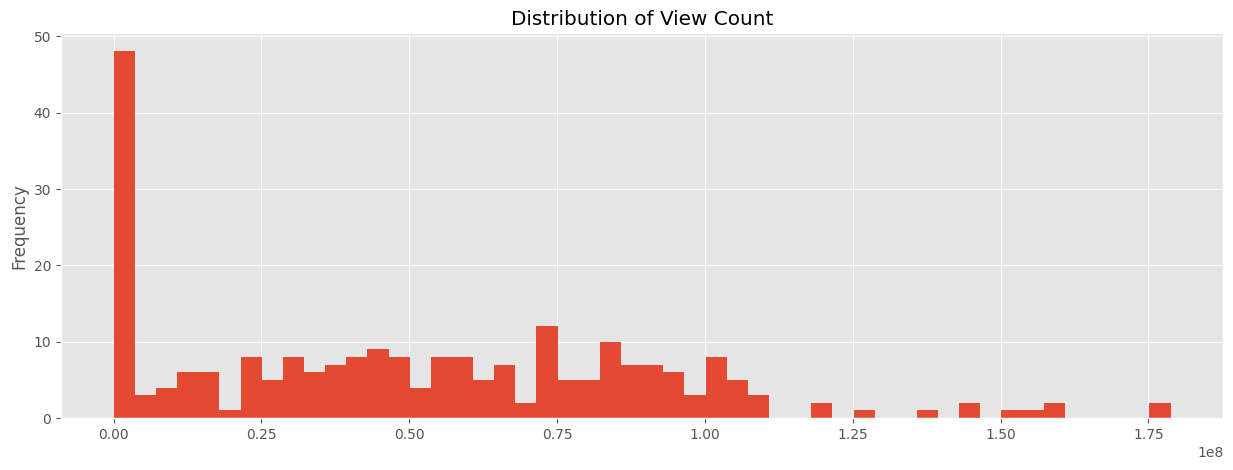

In [1094]:
df['viewCount'].plot(kind='hist', bins=50,
                     title='Distribution of View Count',
                     figsize=(15, 5))

<Axes: title={'center': 'View vs Like Count'}, xlabel='viewCount', ylabel='likeCount'>

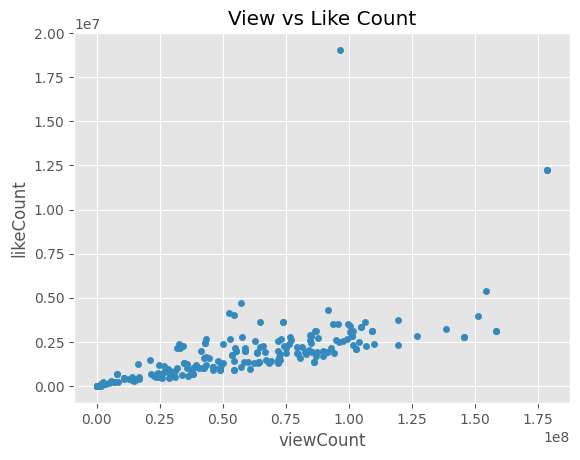

In [1095]:
df.plot(kind='scatter', x='viewCount', y='likeCount', title='View vs Like Count')

In [1096]:
df.query('likeCount > 10000000')

,title,description,publishTime,duration_seconds,viewCount,likeCount,commentCount,like_to_view_ratio
id,,,,,,,,
0e3GPea1Tyg,"$456,000 Squid Game In Real Life!",MAKE SURE YOU WATCH UNTIL GLASS BRIDGE IT'S IN...,2021-11-24 21:00:01+00:00,1542,178763228,12250732,571946.0,0.068530
0e3GPea1Tyg,"$456,000 Squid Game In Real Life!",MAKE SURE YOU WATCH UNTIL GLASS BRIDGE IT'S IN...,2021-11-24 21:00:01+00:00,1542,178763228,12250732,571946.0,0.068530
dBxOYE2j55U,Make This Video The Most Liked Video On Youtube,"WHAT IS UP LOGANG, MAKE SURE YOU LIKE THE VIDE...",2019-01-16 22:05:01+00:00,791,96523287,19049431,277088.0,0.197356


## Save our output

In [1097]:
df.to_csv('processed_data.csv')